In [ ]:
import json 
import tensorflow as tf 
import tensorflow.keras as keras
import json 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 



In [ ]:
file ="data.json"

def load_data(filename=file):
    with open(filename, "r") as f:
        data = json.load(f)

        inputs = np.array(data["mffc"])
        targets = np.array(data["labels"])

    return inputs ,  targets 



def prepared_dataset(test_size, validation_size):
    X,y = load_data()

    X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=test_size)
    #Here we create the validation 


    X_train , X_validation , y_train , y_validation =  train_test_split(X_train ,y_train , test_size=validation_size)

    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train , X_validation ,X_test , y_train ,y_validation , y_test  


def build_model(input_shape):
 
    
    model = keras.Sequential()

 
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())


    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())


    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))


    model.add(keras.layers.Dense(1, activation='sigmoid'))

    return model 



def predict(model, X, y):
 
     
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))



In [13]:
 X,y = load_data()

In [ ]:
X_train , X_validation ,X_test , y_train ,y_validation , y_test= prepared_dataset(0.25 , 0.2)
   
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimiser,  loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

    # train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

model.save("model.h5")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 3, 11, 32)         320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 6, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 6, 32)          128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 5, 32)          4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 3, 32)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 3, 32)          128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)               

In [ ]:
def plot_graph(history , string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel(string)
  plt.ylabel("val_"+string)
  plt.legend([string , "val_"+string])
  plt.show()



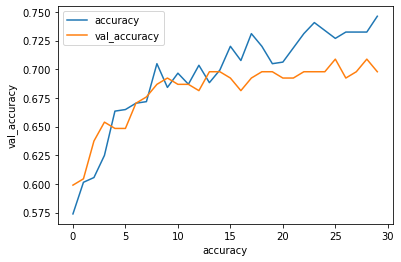

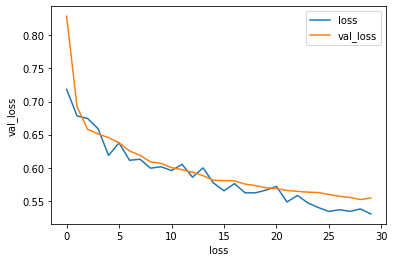

In [ ]:
plot_graph(history , "accuracy")
plot_graph(history , "loss")
